In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)

In [2]:
vec_wI = np.array([0.1, 1, 10])
vec_wI_label = ["5", "10", "20"]
vec_alpha = np.linspace(0, 1, 101)

df_mu = pd.DataFrame({'alpha':vec_alpha,
					vec_wI[0]:np.zeros_like(vec_alpha),
					vec_wI[1]:np.zeros_like(vec_alpha),
					vec_wI[2]:np.zeros_like(vec_alpha)})

df_sigma_V = pd.DataFrame({'alpha':vec_alpha,
						vec_wI[0]:np.zeros_like(vec_alpha),
						vec_wI[1]:np.zeros_like(vec_alpha),
						vec_wI[2]:np.zeros_like(vec_alpha)})

df_nu = pd.DataFrame({'alpha':vec_alpha,
					vec_wI[0]:np.zeros_like(vec_alpha),
					vec_wI[1]:np.zeros_like(vec_alpha),
					vec_wI[2]:np.zeros_like(vec_alpha)})

for wI in vec_wI:
	for i, alpha in enumerate(vec_alpha):
		model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha, 
						 					EL_val = -60,
						 					EF_val = 0,
						 					ES_val = 0,
						 					EI_val = -80,
						 					wF_val = 0.5,
						 					wS_val = 0.5,
						 					wI_val = wI,
						 					tauF_val = 1,
						 					tauS_val = 100,
						 					tauI_val = 10,
						 					nuF_val = 0.005,
						 					nuS_val = 0.005,
						 					nuI_val = 0.005,
						 					KF_val = 400,
						 					KS_val = 400,
						 					KI_val = 100,
						 					Vth_val = -50,
						 					Vr_val = -60,
						 					tauL_val = 20,
						 					tauR_val = 2
						 				)

		LV_model = mf.LangevinModel(model_type)
		LV_model.sigmaV
		mu, sigma = LV_model.model_type.data_parameters.substitute_parameters_values([LV_model.mu, LV_model.sigmaV])
		df_mu[wI][i] = mu
		df_sigma_V[wI][i] = sigma



/tmp/ipykernel_30276/1560167936.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu[wI][i] = mu
/tmp/ipykernel_30276/1560167936.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sigma_V[wI][i] = sigma


In [15]:
n = 30000

for wI in vec_wI:
	print(wI, end='\t')
	for i, alpha in enumerate(vec_alpha):
		print(i, end=' ')
		model_type = mt.MFInterpolatedCoBaIF(alpha_val = alpha, 
						 					EL_val = -60,
						 					EF_val = 0,
						 					ES_val = 0,
						 					EI_val = -80,
						 					wF_val = 0.5,
						 					wS_val = 0.5,
						 					wI_val = wI,
						 					tauF_val = 1,
						 					tauS_val = 100,
						 					tauI_val = 10,
						 					nuF_val = 0.005,
						 					nuS_val = 0.005,
						 					nuI_val = 0.005,
						 					KF_val = 400,
						 					KS_val = 400,
						 					KI_val = 100,
						 					Vth_val = -50,
						 					Vr_val = -60,
						 					tauL_val = 20,
						 					tauR_val = 2
						 				)
		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, False)
		E_I = model_type.data_parameters.values[model_type.vec_E[3]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu[wI][i] = FP_model.calculate_firing_rate (vec_Vk)
	
	print()

0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
10.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 


In [4]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_wI_interpolated.dat", index_col=0)
df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_interpolated_wI.dat", index_col=0)
df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_interpolated_wI.dat", index_col=0)

df_nu_sim_read

,alpha,0.1,1,10
0,0.00,125.0,0.0,0.0
1,0.02,293.9,87.9,0.0
2,0.04,359.0,270.0,0.0
3,0.06,392.9,348.9,0.5
4,0.08,411.7,387.8,1.0
5,0.10,426.1,410.1,7.4
6,0.12,437.5,426.6,11.8
7,0.14,445.0,437.7,20.1
8,0.16,451.6,445.0,34.0
9,0.18,456.1,450.9,55.5


In [16]:
df_nu_sim = pd.DataFrame({"alpha": df_nu_sim_read['alpha'],
					vec_wI[0]:df_nu_sim_read['0.1'], 
					vec_wI[1]:df_nu_sim_read['1'],
					vec_wI[2]:df_nu_sim_read['10']})

df_mu_sim = pd.DataFrame({"alpha": df_mu_sim_read['alpha'],
					vec_wI[0]:df_mu_sim_read['0.1'], 
					vec_wI[1]:df_mu_sim_read['1'],
					vec_wI[2]:df_mu_sim_read['10']})

df_sigma_V_sim = pd.DataFrame({"alpha": df_sigma_V_sim_read['alpha'],
					vec_wI[0]:df_sigma_V_sim_read['0.1'], 
					vec_wI[1]:df_sigma_V_sim_read['1'],
					vec_wI[2]:df_sigma_V_sim_read['10']})

df_analytic_comp = pd.DataFrame({vec_wI[0]:df_nu_sim_read['0.1'], 
					vec_wI[1]:df_nu_sim_read['1'],
					vec_wI[2]:df_nu_sim_read['10']})

for wI in vec_wI:
	for i in range(len(df_analytic_comp[wI])):
		df_analytic_comp[wI][i] = df_nu[wI][2*i]


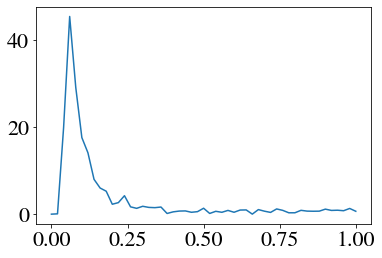

In [43]:
plt.plot(df_nu_sim_read['alpha'], np.abs(df_nu_sim[vec_wI[0]] - df_analytic_comp[vec_wI[0]]*1000))
# plt.plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[0]], 'bo')

In [17]:
df_error = pd.DataFrame({'alpha':df_nu_sim['alpha'],
						vec_wI[0]:np.zeros_like(df_nu_sim['alpha']),
						vec_wI[1]:np.zeros_like(df_nu_sim['alpha']),
						vec_wI[2]:np.zeros_like(df_nu_sim['alpha'])})

for wI in vec_wI:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[wI], df_analytic_comp[wI])):
		df_error[wI][i] = np.abs(nu_sim - nu_analyt * 1000)

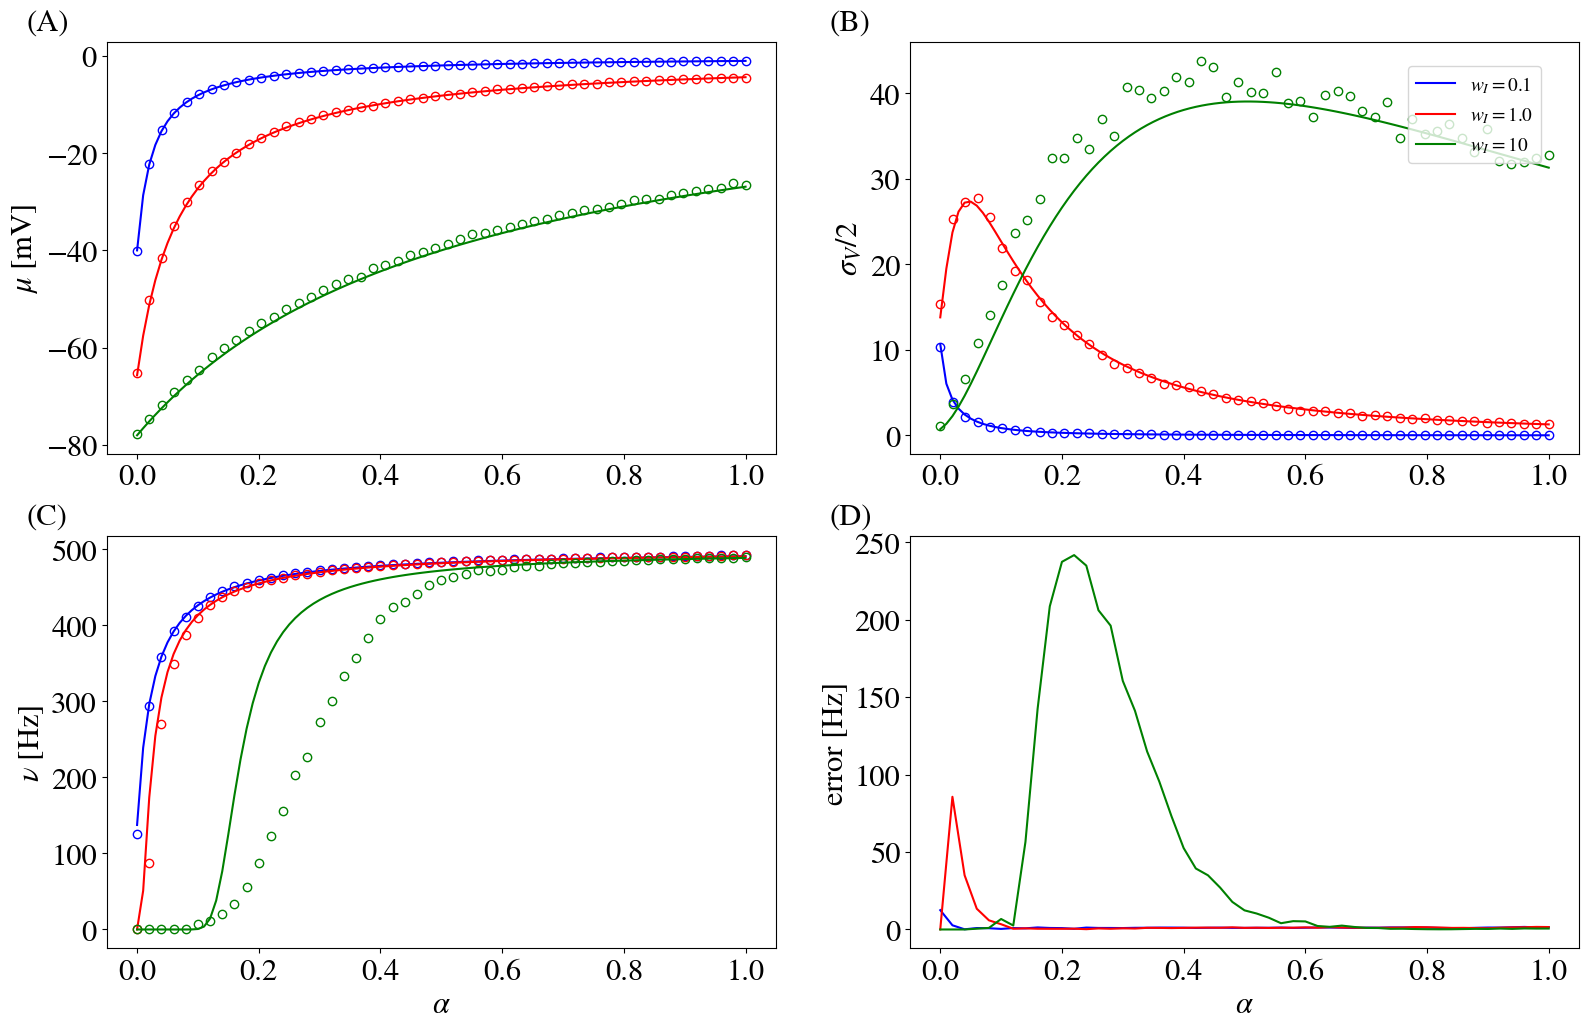

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\alpha$')
axs[1][1].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\mu$ [mV]')
axs[0][1].set_ylabel(r'$\sigma_V/2$')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel('error [Hz]')

axs[0][0].plot(df_mu['alpha'], df_mu[vec_wI[0]], 'b-', label=r'$w_I = 0.1$')
axs[0][0].plot(df_mu_sim['alpha'], df_mu_sim[vec_wI[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(df_mu['alpha'], df_mu[vec_wI[1]], 'r-', label=r'$w_I = 1.0$')
axs[0][0].plot(df_mu_sim['alpha'], df_mu_sim[vec_wI[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(df_mu['alpha'], df_mu[vec_wI[2]], 'g-', label=r'$w_I = 10$')
axs[0][0].plot(df_mu_sim['alpha'], df_mu_sim[vec_wI[2]], 'go', markerfacecolor='none')

axs[0][1].plot(df_sigma_V['alpha'], df_sigma_V[vec_wI[0]]/2, 'b-')
axs[0][1].plot(df_sigma_V_sim['alpha'], df_sigma_V_sim[vec_wI[0]], 'bo', markerfacecolor='none')
axs[0][1].plot(df_sigma_V['alpha'], df_sigma_V[vec_wI[1]]/2, 'r-')
axs[0][1].plot(df_sigma_V_sim['alpha'], df_sigma_V_sim[vec_wI[1]], 'ro', markerfacecolor='none')
axs[0][1].plot(df_sigma_V['alpha'], df_sigma_V[vec_wI[2]]/2, 'g-')
axs[0][1].plot(df_sigma_V_sim['alpha'], df_sigma_V_sim[vec_wI[2]], 'go', markerfacecolor='none')

axs[1][0].plot(df_nu['alpha'], df_nu[vec_wI[0]]*1000, 'b-')
axs[1][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[0]], 'bo', markerfacecolor='none')
axs[1][0].plot(df_nu['alpha'], df_nu[vec_wI[1]]*1000, 'r-')
axs[1][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(df_nu['alpha'], df_nu[vec_wI[2]]*1000, 'g-')
axs[1][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[2]], 'go', markerfacecolor='none')

axs[1][1].plot(df_error['alpha'], df_error[vec_wI[0]], 'b-')
axs[1][1].plot(df_error['alpha'], df_error[vec_wI[1]], 'r-')
axs[1][1].plot(df_error['alpha'], df_error[vec_wI[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

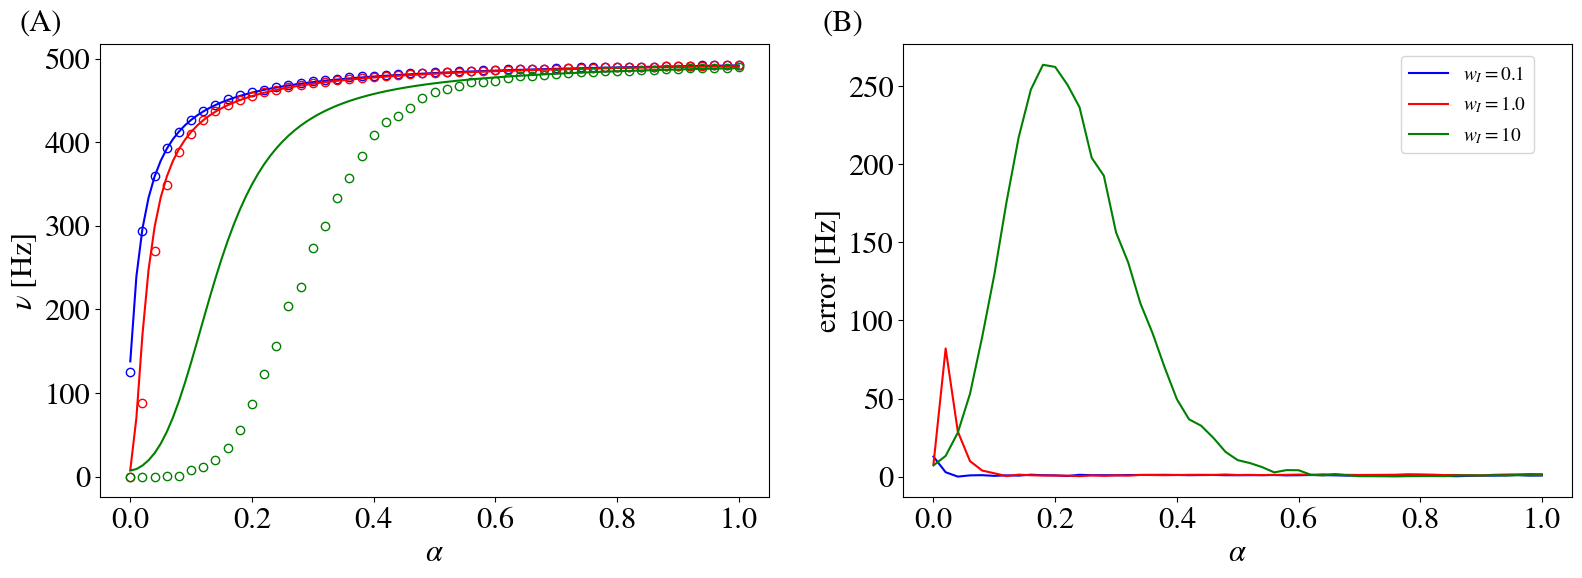

In [14]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\alpha$')
axs[0][1].set_xlabel(r'$\alpha$')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(df_nu['alpha'], df_nu[vec_wI[0]]*1000, 'b-', label=r'$w_I = 0.1$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(df_nu['alpha'], df_nu[vec_wI[1]]*1000, 'r-', label=r'$w_I = 1.0$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(df_nu['alpha'], df_nu[vec_wI[2]]*1000, 'g-', label=r'$w_I = 10$')
axs[0][0].plot(df_nu_sim['alpha'], df_nu_sim[vec_wI[2]], 'go', markerfacecolor='none')

axs[0][1].plot(df_error['alpha'], df_error[vec_wI[0]], 'b-')
axs[0][1].plot(df_error['alpha'], df_error[vec_wI[1]], 'r-')
axs[0][1].plot(df_error['alpha'], df_error[vec_wI[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})